# Monte Carlo Assignment Codes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

## Calculate pi using Monte Carlo Integration.

Random samples will be taken in a quarter circle of unit radius. 

pi = 4 * (hits/shots) 

### First, we'll use a loop (slower performance)

In [155]:
def calculate_pi_loop(N): 
    hits = np.zeros(N)
    for i in range(N): 
        point = np.random.rand(2)
        dist = point[0]**2 + point[1]**2
        hits[i] = dist < 1
    return 4*hits.sum()/N

In [167]:
start = time.time()
calculate_pi_loop(1000000)
print(time.time()-start)

5.037470102310181


In [4]:
def calculate_pi(N,plot): 
    x = np.random.rand(N)
    y = np.random.rand(N)
    dist = x**2 + y**2
    circle = dist < 1
    if plot: 
        to_plot = np.arange(0,1.1,0.01)
        to_plot_y = (1 - to_plot**2)**(1/2)
        plt.plot(to_plot,to_plot_y,'k')
        plt.scatter(x,y,c=circle)
        plt.axis('square')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    return 4*(circle.sum())/N

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


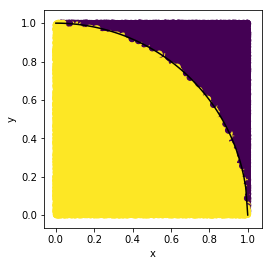

3.14784

In [5]:
calculate_pi(100000,True)

Calculate pi over a range of numbers of steps

In [293]:
my_pi = []
Ns = [10,10**2,10**3,10**4,10**5,10**6,10**7]
for N in Ns: 
    my_pi.append(calculate_pi(N,False))

Plot the absolute error

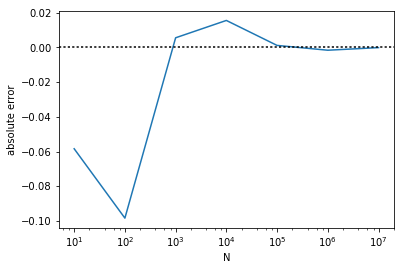

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Ns,math.pi*np.ones_like(my_pi)-my_pi)
ax.set_xscale('log')
plt.axhline(0,color='k',linestyle='dotted')
plt.xlabel("N")
plt.ylabel("absolute error")
plt.show()

Plot the relative error

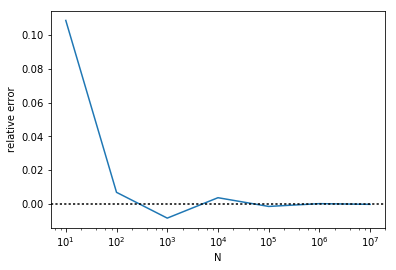

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111)
perror = (math.pi*np.ones_like(my_pi)-my_pi)/(math.pi*np.ones_like(my_pi))
plt.plot(Ns,perror)
ax.set_xscale('log')
plt.axhline(0,color='k',linestyle='dotted')
plt.xlabel("N")
plt.ylabel("relative error")
plt.show()

## Solve Sodoku Puzzle with Monte Carlo

read in the puzzle

In [3]:
puzzle = pd.read_csv('sodoku1.txt',delim_whitespace=True,header=None)
variable = puzzle == 0

Let's see how many of each number we have. There should be 9 of each number 1-9

In [4]:
this = plt.hist(np.reshape(puzzle.values,81),bins=10)
nums = pd.DataFrame(this[0].astype(int)).transpose()
nums

,0,1,2,3,4,5,6,7,8,9
0,53,3,1,4,4,1,5,5,3,2


In [5]:
guess_list = []
for num in range(1,10): 
    for i in range(9-nums[num][0]): 
        guess_list.append(num)
guess_list = np.array(guess_list)

In [6]:
guess_puzzle = np.matrix(puzzle.copy())
index = 0
for i in range(9): 
    for j in range(9): 
        if guess_puzzle[i,j] == 0: 
            guess_puzzle[i,j] = guess_list[index]
            index = index + 1
guess_puzzle = pd.DataFrame(guess_puzzle)
guess_puzzle

,0,1,2,3,4,5,6,7,8
0,1,1,1,4,1,9,1,3,1
1,2,2,2,6,1,2,7,2,2
2,2,6,4,7,2,3,3,3,3
3,3,3,1,4,4,4,4,2,4
4,4,5,8,5,5,5,3,5,9
5,5,7,5,5,6,6,6,6,6
6,7,7,7,3,7,7,8,6,8
7,8,8,7,8,5,6,8,8,9
8,9,4,9,1,9,8,9,9,9


Now create an objective function
- penalize two of the same number in the same row
- penalize two of the same number in the same columne
- penalize two fo the same number in the same 3x3 square

In [11]:
def calculate_objective_function(guess): 
    obj = 0
    for i in range(9): # penalize columns & rows
        obj += 9 - ((pd.unique(guess[i])).shape[0])
        obj += 9 - ((pd.unique(guess.loc[i])).shape[0])
    for i in [0,3,6]: 
        for j in [0,3,6]:
            obj += 9 - ((np.unique(guess.iloc[i:i+3,j:j+3].values)).shape[0])
    return obj

In [369]:
guess = guess_puzzle.copy()
obj = 0
start1 = time.time()
for i in range(9): # penalize columns & rows
    obj += 9 - ((pd.unique(guess[i])).shape[0])
print(time.time()-start1)
start3 = time.time()
for i in range(9):   
    obj += 9 - ((pd.unique(guess.loc[i])).shape[0])
print(time.time()-start3)
start2 = time.time()
for i in [0,3,6]: 
    for j in [0,3,6]:
        obj += 9 - ((np.unique((guess.iloc[i:i+3,j:j+3]).values)).shape[0])
print(time.time()-start2)

0.0014569759368896484
0.0021278858184814453
0.004096031188964844


In [12]:
def make_a_step(guess,variable): 
    pos1 = np.random.randint(0,9,size=2)
    while ~(variable.iloc[pos1[0],pos1[1]]):
        pos1 = np.random.randint(0,9,size=2)
    pos2 = np.random.randint(0,9,size=2)
    while ~(variable.iloc[pos2[0],pos2[1]]): 
        pos2 = np.random.randint(0,9,size=2)
#    print(pos1)
#    print(pos2)
    new_guess = guess.copy()
    temp = new_guess.iloc[pos1[0],pos1[1]]
    new_guess.iloc[pos1[0],pos1[1]] = new_guess.iloc[pos2[0],pos2[1]]
    new_guess.iloc[pos2[0],pos2[1]] = temp
    return new_guess

In [14]:
guess_puzzle

,0,1,2,3,4,5,6,7,8
0,1,1,1,4,1,9,1,3,1
1,2,2,2,6,1,2,7,2,2
2,2,6,4,7,2,3,3,3,3
3,3,3,1,4,4,4,4,2,4
4,4,5,8,5,5,5,3,5,9
5,5,7,5,5,6,6,6,6,6
6,7,7,7,3,7,7,8,6,8
7,8,8,7,8,5,6,8,8,9
8,9,4,9,1,9,8,9,9,9


In [ ]:
this_guess = guess_puzzle.copy()
obj_traj = []
objective_function = calculate_objective_function(this_guess)
N = 1000
T = np.arange(5,0,-(5/N))
print(objective_function)
time1 = 0
time2 = 0
start = time.time()
for i in range(N): 
    start1 = time.time()
    new_guess = make_a_step(this_guess,variable)
    time1 += (time.time()-start1)
    start2 = time.time()
    new_objective_function = calculate_objective_function(new_guess)
    time2 += time.time() - start2
    #print(new_objective_function)
    if new_objective_function < objective_function:
        this_guess = new_guess
        objective_function = new_objective_function
    else: 
        probability = math.exp((objective_function-new_objective_function)/T[i])
        if (np.random.rand()) < probability: 
            this_guess = new_guess
            objective_function = new_objective_function
    #print(new_objective_function,"obj",objective_function)
    if (i % 100 == 0): 
        print(objective_function)
    obj_traj.append(objective_function)
print("total time",time.time()-start)
print("time1",time1)
print("time2",time2)
print(objective_function)
this_guess

In [37]:
(np.append(T,np.zeros(1000))).shape

(2000,)

In [ ]:
this_guess = guess_puzzle.copy()
obj_traj = []
objective_function = calculate_objective_function(this_guess)
N = 10000
T = np.arange(5,0,-(5/N))
T = np.append(T,np.zeros(1000))
print(objective_function)
for i in range(2*N): 
    new_guess = make_a_step(this_guess,variable)
    new_objective_function = calculate_objective_function(new_guess)
    if new_objective_function < objective_function:
        this_guess = new_guess
        objective_function = new_objective_function
    else: 
        probability = math.exp((objective_function-new_objective_function)/T[i])
        if (np.random.rand()) < probability: 
            this_guess = new_guess
            objective_function = new_objective_function
    #print(new_objective_function,"obj",objective_function)
    if (i % 100 == 0): 
        print(objective_function)
    obj_traj.append(objective_function)
print(objective_function)
this_guess

In [41]:
this_guess

,0,1,2,3,4,5,6,7,8
0,7,1,2,4,6,9,5,3,8
1,9,5,3,6,1,5,7,4,2
2,8,6,4,7,8,3,9,2,1
3,6,9,1,5,3,4,8,2,7
4,4,2,8,1,7,6,3,5,9
5,3,7,5,8,2,9,6,1,4
6,5,2,9,3,4,7,8,6,3
7,3,8,7,2,5,6,4,9,1
8,1,4,6,1,9,8,2,7,5


In [40]:
guess_puzzle

,0,1,2,3,4,5,6,7,8
0,1,1,1,4,1,9,1,3,1
1,2,2,2,6,1,2,7,2,2
2,2,6,4,7,2,3,3,3,3
3,3,3,1,4,4,4,4,2,4
4,4,5,8,5,5,5,3,5,9
5,5,7,5,5,6,6,6,6,6
6,7,7,7,3,7,7,8,6,8
7,8,8,7,8,5,6,8,8,9
8,9,4,9,1,9,8,9,9,9


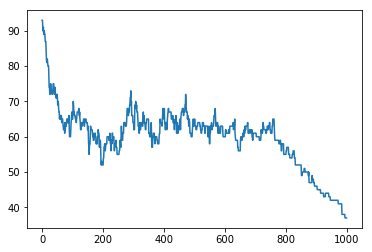

In [31]:
plt.plot(range(N),obj_traj)
plt.show()